# IPL Case Study

The Indian Premier League or IPL is a T20 cricket tournament organized annually by the Board of Control for Cricket In India (BCCI). Eight city-based franchises compete with each other over 6 weeks to find the winner.

In this case study, I'm going to analyze data from the IPL's past seasons to see which teams have won the most games, how teams behave when winning a toss, who has the greatest legacy, and so on.

I have done this analysis from a historical point of view, giving an overview of what has happened in the IPL over the years. I have used tools such as Pandas, Matplotlib and Seaborn along with Python to give a visual as well as numeric representation of the data in front of us.

Pandas stands for Python Data Analysis library. It is typically used for working with tabular data (similar to the data stored in a spreadsheet). Pandas provides helper functions to read data from various file formats like CSV, Excel spreadsheets, HTML tables, JSON, SQL and perform operations on them.

Matplotlib and Seaborn are two Python libraries that are used to produce plots. Matplotlib is generally used for plotting lines, pie charts, and bar graphs.

Seaborn provides some more advanced visualization features with less syntax and more customizations. I switch back-and-forth between them during the analysis.

# Steps Taken In Full Process


1. Data preprocessing(data Cleaning)
2. Exploratory Data Analysis
3. Feature Selection
3. Train Test split
4. Model Selection 
5. Model Accuracy and and its Impact

# Data Preprocessing 

In [1]:
# importing pandas and numpy

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading IPl data

data = pd.read_csv("ipl.csv")
data.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


# Exploratory Data Analysis

In [3]:
# collection information about data such as null value, data type and many more
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [4]:
# shape of dataset
data.shape

(76014, 15)

In [5]:
# finding all columns in dataset

data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [6]:
# remove unwanted column from dataset

column_remove = ['mid','venue', 'batsman', 'bowler', 'striker','non-striker']

data.drop(labels = column_remove , axis=1, inplace =True)

In [7]:
# viewing new data

data

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222
...,...,...,...,...,...,...,...,...,...
76009,2017-05-21,Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,129
76010,2017-05-21,Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,129
76011,2017-05-21,Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,129
76012,2017-05-21,Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,129


In [8]:
# finding unique value in bat_team

data.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
# finding unique value in bat_team

data.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

# Feature Selection

In [10]:
# Now taking out all time 8 teams in IPL

required_team = ['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Sunrisers Hyderabad']

In [11]:
# now removing all extra teams except these 8 team from bat_teams and bowl_team

data = data[(data["bat_team"].isin(required_team))&(data["bowl_team"].isin(required_team))]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53811 entries, 0 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            53811 non-null  object 
 1   bat_team        53811 non-null  object 
 2   bowl_team       53811 non-null  object 
 3   runs            53811 non-null  int64  
 4   wickets         53811 non-null  int64  
 5   overs           53811 non-null  float64
 6   runs_last_5     53811 non-null  int64  
 7   wickets_last_5  53811 non-null  int64  
 8   total           53811 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.1+ MB


In [13]:
# here above datatype of data column is object we need to converrt it into data

data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d")

<ipython-input-13-82e2f49c0a88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d")


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53811 entries, 0 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            53811 non-null  datetime64[ns]
 1   bat_team        53811 non-null  object        
 2   bowl_team       53811 non-null  object        
 3   runs            53811 non-null  int64         
 4   wickets         53811 non-null  int64         
 5   overs           53811 non-null  float64       
 6   runs_last_5     53811 non-null  int64         
 7   wickets_last_5  53811 non-null  int64         
 8   total           53811 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 4.1+ MB


In [15]:
# atleast we need over data beyond 5 over

# data = data[data["overs"]>=5.0]
data= data[data["overs"]>=5.0]

In [16]:
dataset =data
dataset

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107


In [17]:
# now convert categorical values into dummy values 

df = pd.get_dummies(data=dataset , columns=["bat_team","bowl_team"])
df

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,106,9,18.1,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75885,2017-05-19,107,9,18.2,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75886,2017-05-19,107,9,18.3,28,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75887,2017-05-19,107,9,18.4,24,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Train Test split

In [18]:
x_train = df.drop(labels='total', axis=1)[df["date"].dt.year<=2016]
x_test =  df.drop(labels='total', axis=1)[df["date"].dt.year>=2017]

In [19]:
# x_train= x_train.drop(lables="total" ,axis=1, inplace =True)
# x_test = x_test.drop(lables="total" ,axis=1 ,inplace =True)
x_train.drop(labels="date", axis=1 , inplace=True)
x_test.drop(labels="date", axis=1 , inplace=True)

In [20]:
x_train

,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,61,0,5.1,59,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
33,61,1,5.2,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34,61,1,5.3,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
35,61,1,5.4,59,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36,61,1,5.5,58,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,194,7,19.2,54,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68858,200,7,19.3,56,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68859,201,7,19.4,56,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
68860,202,7,19.5,57,4,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [21]:
prediction_data =df[["date",'total']]
prediction_data 

# y_train = df.drop(lables="date")[df["date"].dt.year<=2016]
# y_test = df.drop(lables ="date")[df["date"].dt.year>=2017]

,date,total
32,2008-04-18,222
33,2008-04-18,222
34,2008-04-18,222
35,2008-04-18,222
36,2008-04-18,222
...,...,...
75884,2017-05-19,107
75885,2017-05-19,107
75886,2017-05-19,107
75887,2017-05-19,107


In [22]:
y_train = prediction_data.drop(labels='date',axis=1)[prediction_data['date'].dt.year<=2016]
y_test = prediction_data.drop(labels='date', axis =1)[prediction_data['date'].dt.year>=2017]

In [23]:
# y_train

# Models

# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [25]:
LR.score(x_train,y_train)

0.6502133812161469

In [26]:
LR.score(x_test,y_test)

0.7522633566350542

In [27]:
y_pred = LR.predict(x_test)

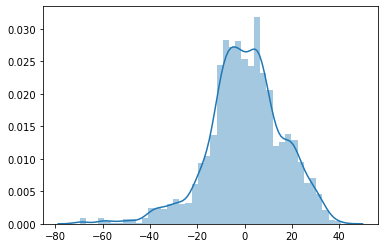

In [28]:
sns.distplot(y_test-y_pred)

In [29]:
from sklearn import metrics
import numpy as np
print("MAE:Mean absoulte error",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:Mean Squared error",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:root Mean Squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:Mean absoulte error 12.11861754619324
MSE:Mean Squared error 251.00792310417287
RMSE:root Mean Squared error 15.843229566732058


In [34]:
import pickle
#open a file , where you want to store the data
file = open('IPL_linear_model.pkl','wb')

# dump information to that file 
pickle.dump(LR,file)

# DecisionTreeRegression

In [39]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [40]:
DTR.score(x_train,y_train)

0.9998567447518953

In [41]:
DTR.score(x_test,y_test)

0.47433894704046375

# Hyperperameter Tunning 

In [43]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
              "max_depth": [1,2,3,4,5,6,7,8,9,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
              "min_samples_leaf": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
              "max_leaf_nodes": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,130,150,170,210 ,None],
              }

In [44]:

random_cv_dtm = RandomizedSearchCV(estimator = DTR, param_distributions = param_grid, n_iter = 100, cv = 5, verbose=2, n_jobs = -1)

random_cv_dtm.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 37.5min finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90, 100,
                                                           110, 130, 150, 170,
                                                           210, None],
                                        'min_samples_leaf': [10, 20, 30, 40, 50,
                                                             60, 70, 80, 90,
                                                             100, 110, None],
                                        'min_samples_split': [10, 20,

In [45]:
print(random_cv_dtm.best_params_)
print(random_cv_dtm.best_score_)
print(random_cv_dtm.best_estimator_)

{'min_samples_split': 110, 'min_samples_leaf': 90, 'max_leaf_nodes': 210, 'max_depth': 50, 'criterion': 'mse'}
0.5351065613457789
DecisionTreeRegressor(max_depth=50, max_leaf_nodes=210, min_samples_leaf=90,
                      min_samples_split=110)


In [36]:
dtr = DecisionTreeRegressor(max_depth=8, max_leaf_nodes=100, min_samples_leaf=100,
                      min_samples_split=40,criterion='mse')
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, max_leaf_nodes=100, min_samples_leaf=100,
                      min_samples_split=40)

In [37]:
dtr.score(x_train,y_train)

0.6384238965868372

In [37]:
dtr.score(x_test,y_test)

0.6449385886087993

In [38]:
dtr_y_pred = dtr.predict(x_test)
dtr_y_pred

array([170.52539062, 170.52539062, 170.52539062, ..., 121.69811321,
       121.69811321, 121.69811321])

In [39]:
# sns.distplot(y_test-dtr_y_pred)

# Random Forest Rgressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

<ipython-input-41-04d11dfa0347>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(x_train,y_train)


RandomForestRegressor()

In [42]:
RFR.score(x_train,y_train)

0.9923924840283669

In [43]:
RFR.score(x_test,y_test)

0.6778030222143793

# Hyperperameter Tunning

In [38]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4,6,8,10,12,14,16,18,20],
               'min_samples_split': [2, 5, 10,15,20],
               'n_estimators': [130, 180, 230]}

In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 72.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 78.6min finished
C:\Users\Priyam\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   verbose=2)

In [46]:
print(rf_random.best_params_)
print(rf_random.best_score_)
print(rf_random.best_estimator_)

{'n_estimators': 130, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
0.5430685688551172
RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=130)


In [39]:
RFr = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,max_features= 'auto',
                      n_estimators=130)
RFr.fit(x_train,y_train)

NameError: name 'RandomForestRegressor' is not defined

In [48]:
RFr.score(x_train,y_train)

0.8078352701074112

In [49]:
RFr.score(x_test,y_test)

0.7025911037912221

In [50]:
RFr_y_pred = LR.predict(x_test)

# IPL Toss Winning Prediction

In [184]:
data_match = pd.read_csv("matches.csv")
data_match.head(5)

,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,...,win_by_runs,win_by_wickets,player_of_match,venue,Avg 1st Innings Score,Avg 2nd Innings Score,umpire1,umpire2,umpire3,Pitch Type
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,59,1,Royal Challengers Bangalore,54,1,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",185,175,AY Dandekar,NJ Llong,NaN,Batting
1,2,2017,Pune,06-04-2017,Mumbai Indians,61,1,Rising Pune Supergiant,59,1,...,0,7,SPD Smith,Maharashtra Cricket Association Stadium,160,148,A Nand Kishore,S Ravi,NaN,Batting & Spinner Friendly
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,52,1,Kolkata Knight Riders,73,0,...,0,10,CA Lynn,Saurashtra Cricket Association Stadium,183,170,Nitin Menon,CK Nandan,NaN,Batting
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,35,1,Kings XI Punjab,56,2,...,0,6,GJ Maxwell,Holkar Cricket Stadium,160,158,AK Chaudhary,C Shamshuddin,NaN,Batting
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,41,2,Delhi Daredevils,43,2,...,15,0,KM Jadhav,M Chinnaswamy Stadium,170,150,NaN,NaN,NaN,Batting


In [185]:
data_match.columns

Index(['id', 'season', 'city', 'date', 'team1', 'Pplay T1', 'pplay twick1',
       'team2', 'Pplay T2', 'pplay twick2', 'toss_winner', 'toss_decision',
       'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue', 'Avg 1st Innings Score',
       'Avg 2nd Innings Score', 'umpire1', 'umpire2', 'umpire3', 'Pitch Type'],
      dtype='object')

In [186]:
# finding important features for predicting toss winner

DF=pd.DataFrame(data_match,columns = ["team1","team2","city","toss_winner"])
# df = pd.DataFrame (data, columns = ['First Column Name','Second Column Name',...])

In [187]:
DF

,team1,team2,city,toss_winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,Royal Challengers Bangalore
1,Mumbai Indians,Rising Pune Supergiant,Pune,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Rajkot,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Indore,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Bangalore,Royal Challengers Bangalore
...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians,Chennai,Chennai Super Kings
753,Sunrisers Hyderabad,Delhi Capitals,Visakhapatnam,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings,Visakhapatnam,Chennai Super Kings


In [188]:
required_team

['Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Chennai Super Kings',
 'Sunrisers Hyderabad']

In [189]:
DF =DF[(DF["team1"].isin(required_team))&(DF["team2"].isin(required_team))]

In [190]:
# DF["toss_winner"].unique()
DF

,team1,team2,city,toss_winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,Royal Challengers Bangalore
4,Royal Challengers Bangalore,Delhi Daredevils,Bangalore,Royal Challengers Bangalore
6,Kolkata Knight Riders,Mumbai Indians,Mumbai,Mumbai Indians
7,Royal Challengers Bangalore,Kings XI Punjab,Indore,Royal Challengers Bangalore
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai,Mumbai Indians
...,...,...,...,...
749,Sunrisers Hyderabad,Royal Challengers Bangalore,Bengaluru,Royal Challengers Bangalore
750,Chennai Super Kings,Kings XI Punjab,Mohali,Kings XI Punjab
751,Kolkata Knight Riders,Mumbai Indians,Mumbai,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians,Chennai,Chennai Super Kings


In [191]:
DF1 = pd.get_dummies(DF, columns=["team1","team2","city"])

In [192]:
DF1

,toss_winner,team1_Chennai Super Kings,team1_Delhi Daredevils,team1_Kings XI Punjab,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Rajasthan Royals,team1_Royal Challengers Bangalore,team1_Sunrisers Hyderabad,team2_Chennai Super Kings,...,city_Kimberley,city_Kolkata,city_Mohali,city_Mumbai,city_Port Elizabeth,city_Pune,city_Raipur,city_Ranchi,city_Sharjah,city_Visakhapatnam
0,Royal Challengers Bangalore,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Royal Challengers Bangalore,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Mumbai Indians,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,Royal Challengers Bangalore,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Mumbai Indians,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,Royal Challengers Bangalore,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
750,Kings XI Punjab,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
751,Mumbai Indians,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
752,Chennai Super Kings,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
X=DF1.iloc[:,1:]
Y=DF1.iloc[:,0]
Y

0      Royal Challengers Bangalore
4      Royal Challengers Bangalore
6                   Mumbai Indians
7      Royal Challengers Bangalore
9                   Mumbai Indians
                  ...             
749    Royal Challengers Bangalore
750                Kings XI Punjab
751                 Mumbai Indians
752            Chennai Super Kings
755                 Mumbai Indians
Name: toss_winner, Length: 555, dtype: object

In [194]:
#train and test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=30, random_state=22)


In [231]:
# from sklearn import tree

# model = tree.DecisionTreeClassifier()
# # DT_classifier=DecisionTreeClassifier()
# model.fit(X_train,Y_train)
# # DT_classifier.fit(x_test)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
DT_classifier=DecisionTreeClassifier(criterion='entropy',max_depth= 17)
DT_classifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17)

In [232]:
DT_classifier.score(X_train,Y_train)

0.8038095238095239

In [233]:
DT_classifier.score(X_test,Y_test)

0.6333333333333333

# Hyperperameter Tunning

In [234]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#making the instance
model= DecisionTreeClassifier()
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,Y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,Y_test))

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 7, 'random_state': 123}
Accuracy: 0.6
Confusion Metrix:
 [[2 0 2 0 0 1 1 0]
 [0 1 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0]
 [0 0 1 3 0 2 0 0]
 [0 1 0 0 5 0 0 0]
 [0 0 0 0 1 3 0 0]
 [0 0 0 0 0 1 3 0]
 [0 0 0 0 1 0 0 0]]


# Random Forest



In [278]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(max_depth= 18)
RF_clf.fit(X_train , Y_train)

RandomForestClassifier(max_depth=18)

In [279]:
RF_clf.score(X_train , Y_train)

0.8038095238095239

In [280]:
RF_clf.score(X_test , Y_test)

0.6666666666666666

# Hyperperameter Tunning

In [275]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#learning
model1.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,Y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,Y_test))

Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 10, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.5333333333333333
Confusion Metrix:
 [[1 0 1 0 1 1 1 0]
 [0 2 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0]
 [0 0 1 3 0 1 0 0]
 [0 0 0 0 4 1 1 0]
 [0 0 0 0 1 3 0 0]
 [1 0 0 0 0 1 2 0]
 [0 0 1 0 1 0 0 0]]


# ADA Boosting

In [276]:
from sklearn.ensemble import AdaBoostClassifier
Ada_clf = AdaBoostClassifier()
Ada_clf.fit(X_train,Y_train)

AdaBoostClassifier()

In [277]:
Ada_clf.score(X_train,Y_train)

0.5828571428571429

In [241]:
Ada_clf.score(X_test,Y_test)

0.5333333333333333

# Bagging

In [242]:
from sklearn.ensemble import BaggingClassifier
Bag_clf = BaggingClassifier(bootstrap=True, max_samples=0.7, n_estimators=400,
                  n_jobs=None, oob_score=True, random_state=22, verbose=0)
Bag_clf.fit(X_train,Y_train)

BaggingClassifier(max_samples=0.7, n_estimators=400, oob_score=True,
                  random_state=22)

In [243]:
Bag_clf.score(X_train,Y_train)

0.8038095238095239

In [244]:
Bag_clf.score(X_test,Y_test)

0.6333333333333333

# Gradient Boosting

In [305]:
from sklearn.ensemble import GradientBoostingClassifier
GD_clf = GradientBoostingClassifier(n_estimators=50 ,learning_rate= 0.2, random_state=22)
GD_clf.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=50, random_state=22)

In [306]:
GD_clf.score(X_train,Y_train)

0.8

In [307]:
GD_clf.score(X_test,Y_test)

0.6333333333333333